In [1]:
import numpy as np
import matplotlib.pyplot as mp
import sympy as sp

In [2]:
#Z1

N = 100 #chislo chastic
M = 100 #chislo prizhkov
d_a = -0.5
d_b = 0.5
# tau_0 = 0
# tau_M = 1

d = np.random.uniform(-0.5,0.5,(N,M))
tau = np.random.uniform(0,1,(N,M))
print(d)

[[-0.39221743 -0.12061562 -0.465126   ... -0.40415565  0.46279992
  -0.31524686]
 [ 0.06850196  0.14936187 -0.46784061 ... -0.28117271 -0.39961627
   0.26423708]
 [-0.0630186   0.44538979 -0.10889994 ...  0.43988633 -0.17199842
   0.1583663 ]
 ...
 [ 0.04964816  0.30386624 -0.4245101  ... -0.17879006 -0.10615216
   0.44644177]
 [-0.35853938 -0.29510656 -0.37637161 ...  0.08785553 -0.27901738
   0.17102529]
 [-0.24086487  0.20899594 -0.06344989 ...  0.30724194 -0.02580235
   0.33553061]]


In [3]:
#Z2

X = np.zeros((N,M))
for i in range(0,N):
    X[i] = np.cumsum(d[i])
# print(X)

Tau = np.zeros((N,M))
for j in range(0,M):
    Tau[j] = np.cumsum(tau[j])
# print(Tau)

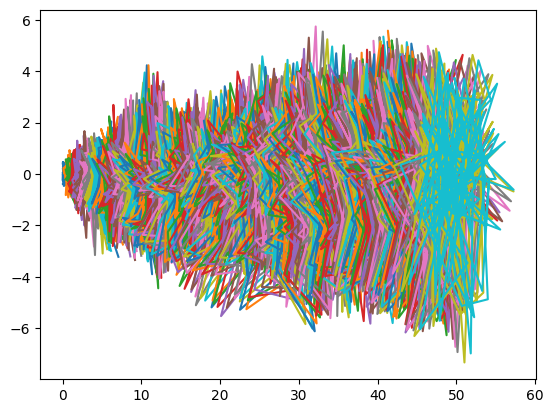

In [4]:
#Z3

# for i in range (0,3):
#     mp.plot(Tau[i],X[i])
mp.plot(Tau,X)

[ 2.24509833e-03  2.76072322e-03 -1.69957630e-03  5.62305621e-03
  2.86181076e-04  2.58516470e-03  4.47117681e-03  8.68644108e-04
  2.68227380e-03  4.78879150e-03 -3.63059943e-04  3.74151098e-03
 -2.71212020e-03  2.43542411e-04 -9.51889367e-04 -9.33139272e-06
  2.65793680e-03 -2.00119481e-03 -4.48991161e-03 -2.30101337e-03
 -4.27311342e-03 -5.28864090e-04  5.64147614e-03  4.77632125e-04
 -3.73557309e-03 -3.87037573e-04 -2.47901022e-03 -2.69301745e-03
 -1.96572635e-03 -2.58630220e-03 -2.98908991e-03 -6.53324465e-04
  2.64500446e-04 -2.10285997e-03  4.62430440e-03  3.52516709e-03
  5.08921674e-03 -2.50439974e-03 -3.49955896e-03 -1.16615912e-03
  4.42739404e-03 -3.70336702e-03 -4.00019817e-04  2.06769694e-03
 -2.26687542e-05 -3.75796463e-03  3.16545289e-05  1.43845665e-03
  9.59390407e-04  2.35583198e-03  1.41925639e-03 -1.14737858e-03
 -4.38149003e-04 -2.34698213e-03  1.38367565e-03 -5.60150648e-03
  2.56323970e-03 -1.40120709e-03  1.44427987e-03  1.53388995e-03
 -3.82257826e-05 -1.58542

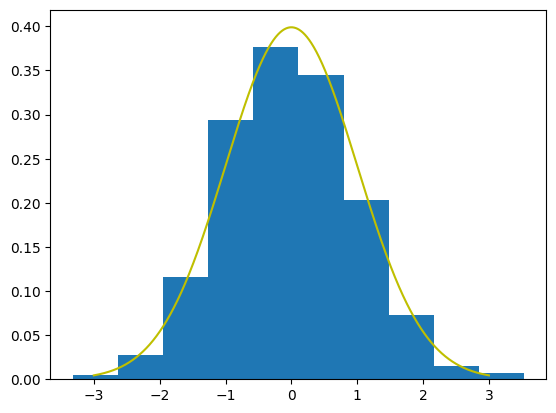

In [5]:
#Z4

n = 10000 #chislo tochek
k = 1000 #chislo viborok

E_t = (d_a + d_b) / 2
# E_t

D_t = (d_b - d_a)**2 / 12
# D_t

d_new = np.random.uniform(d_a,d_b,(k,n))
# print(d_new[1])

# E_p = np.zeros(k)
E_p1 = np.zeros(k)
D_p = np.zeros(k)

# for i in range (0,k):
#     for j in range (0,n):
#         E_p[i] = E_p[i] + d_new[i][j]
#     E_p[i] = E_p[i] / n   
# print(E_p[0])

for i in range (0,k):
    E_p1[i] = np.mean(d_new[i])
print(E_p1)

for i in range (0,k):
    D_p[i] = np.mean((d_new[i]-E_p1[i])**2)
# print(D_p[0])
    
print('E teor: ', E_t, '\t E prog: ', E_p1[0])
print('D teor: ', D_t, '\t D prog: ', D_p[0])

CPT = np.zeros(k)
for i in range (0,k):
    CPT[i] = np.sqrt(n / D_t) * (E_p1[i] - E_t) 
#     (E_p[1] - E_t * n) / np.sqrt(D_p[i] * n)
# print(CPT)
def Normal(x): 
    return 1 / np.sqrt(2 * np.pi) * np.exp(-(x)**2 / 2)

mp.hist(CPT, 10, density=True)
xx=np.linspace(-3,3, n)
# print(Normal(xx))
mp.plot(xx, Normal(xx), 'y-')

In [6]:
#Z5

def Pos_time(t, N, Tau, X):
    pos_x = np.zeros(N)
    for i in range(N):
        pos_j = np.searchsorted(Tau[i], t, side='left')-1
        if(pos_j != -1):
            pos_x[i] = X[i,pos_j]
        else:
            pos_x[i] = X[i,0]
    return pos_x

In [7]:
X[3,:]

array([ 0.09491568,  0.59008536,  0.31599635,  0.6168849 ,  0.50334263,
        0.27315625,  0.66540398,  1.07673431,  1.14516361,  1.07356781,
        0.88041251,  0.59749576,  0.60103082,  0.61995035,  0.2428116 ,
        0.54840595,  0.14782972,  0.44573984,  0.37964212,  0.78485432,
        0.9003679 ,  1.25364951,  0.88775595,  0.8043455 ,  0.85642369,
        0.56826957,  0.79398595,  1.07339248,  0.70049399,  0.69488711,
        0.58729421,  0.27002966,  0.76889015,  0.77115624,  0.95851375,
        0.64925308,  0.55473097,  0.41596343,  0.40892447,  0.48356733,
        0.65953219,  0.64269774,  0.77792043,  0.97668991,  1.2515059 ,
        1.34361449,  0.964926  ,  1.40753863,  1.80297225,  2.14296834,
        1.89862573,  2.03396979,  2.33518409,  2.24865139,  1.99248939,
        2.01502975,  1.63806353,  1.81042406,  1.84419626,  1.5035736 ,
        1.47570542,  0.99593138,  0.99517549,  0.95807214,  1.16197302,
        0.8526077 ,  0.78699792,  1.08293357,  0.8907382 ,  0.84

In [8]:
Tau[3,:]

array([ 0.4094246 ,  0.97941386,  1.11529255,  1.9345128 ,  2.48623478,
        2.74460184,  3.0362268 ,  3.82174161,  4.5695378 ,  4.61688797,
        5.28473506,  6.14323548,  6.67108447,  7.54951626,  7.88567308,
        7.92212035,  8.70957241,  8.98616501,  9.0817186 ,  9.61220296,
       10.49464799, 10.84528532, 11.57716879, 12.41355919, 13.20548773,
       14.12010464, 15.06409883, 15.83689874, 15.8575397 , 16.53071226,
       16.95851969, 17.6538706 , 18.05537378, 18.66622355, 19.30074455,
       20.09413279, 20.77643332, 20.90636662, 21.90574491, 22.55362654,
       22.66327626, 22.92264976, 23.65446494, 24.27649756, 24.33961351,
       24.90752805, 25.02022178, 25.84307445, 26.83449539, 26.87366611,
       27.74692264, 28.60876577, 29.08271745, 29.14155823, 29.85272396,
       30.45363855, 31.41250281, 31.70034051, 32.6517267 , 33.23381031,
       33.61436072, 34.34463807, 34.66960629, 35.35925452, 36.03875735,
       36.27667287, 36.96336665, 37.82853992, 38.30562311, 38.80

In [9]:
Pos_time(2, N, Tau, X)[3]

0.6168849001540035

In [16]:
#Z6

K = 100
dt = min(Tau[:,-1] / K)

XT = np.zeros((N,K))

for k in range (0,K):
    tt = k * dt
    XT[:,k] = Pos_time(tt,N,Tau,X)
print(XT)

[[-0.39221743 -0.39221743 -0.39221743 ... -0.30285321 -0.30285321
  -0.76654141]
 [ 0.06850196  0.06850196  0.06850196 ... -3.6398976  -3.8748949
  -3.8748949 ]
 [-0.0630186  -0.0630186  -0.0630186  ...  0.1849456   0.41155929
   0.41155929]
 ...
 [ 0.04964816  0.04964816  0.3535144  ... -2.89866822 -2.89866822
  -3.28179996]
 [-0.35853938 -0.35853938 -0.35853938 ... -2.29101994 -2.29101994
  -2.2355225 ]
 [-0.24086487 -0.24086487 -0.24086487 ... -1.61483921 -2.05183135
  -2.05183135]]


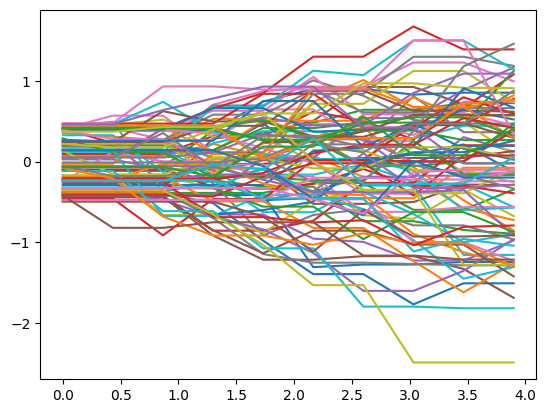

In [17]:
#Z7
%matplotlib inline
TT = np.linspace(0, dt*K, K)
    
for i in range(N):
    mp.plot(TT[:10], XT[i,:10], '-')

42.886237173308764
b=  7


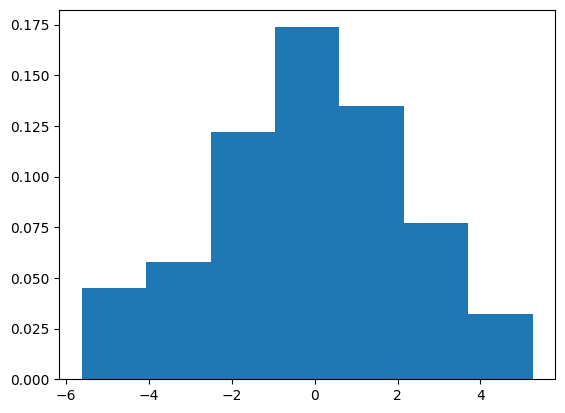

In [18]:
#Z8

k0 = 99
print(TT[k0])

# max(TT)
# min(TT)
# print('max ',max(TT), '\t min ', min(TT))

bins = int(1 + 3.322 * np.log10(K))
print('b= ', bins)
mp.figure()
mp.hist(XT[:, k0], bins, density=True)
mp.show()

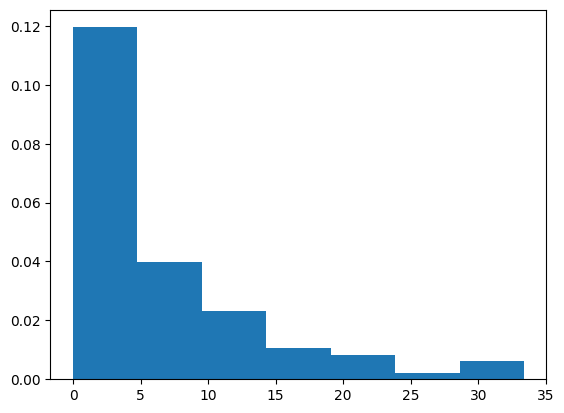

In [40]:
#Z9

XT2 = XT**2
mp.hist(XT2[:, k0], bins, density=True)

E_XT2 = np.zeros(K)
for k in range (0,K):
    E_XT2[k] = np.mean(XT2[:,k])
    
# print(E_XT2)

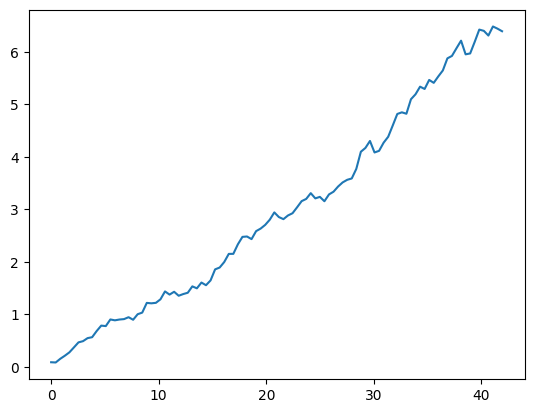

In [41]:
mp.plot(TT,E_XT2)

In [47]:
#Z10
t,x,s,k,w = sp.symbols('t x s k w')

psi = w*sp.exp(-w*t)
p = 1/sp.sqrt(2*sp.pi)*sp.exp(-x**2/2)

p_furie = sp.fourier_transform(p, x, k)
print(p_furie)

psi_lapl = sp.laplace_transform(psi, t, s, noconds = True)
print(psi_lapl)

M_V = 

exp(-2*pi**2*k**2)
w/(s + w)


In [29]:
#Z11 

Nnew = 100
Mnew = 100

X = np.zeros((Nnew,Mnew))
for i in range(0,Nnew):
    X[i] = np.cumsum(d[i])
# print(X)

Tau = np.zeros((Nnew,Mnew))
for j in range(0,Mnew):
    Tau[j] = np.cumsum(tau[j])
# print(Tau)